# Scientific Computing in Python
An introduction to scientific computing in Python by [Dr. Yi-Xin Liu](http://www.yxliu.group) at Fudan University (lyx@fudan.edu.cn).  
This is a part of the course: *Road to Scientific Research: Powerful Computer Applications* (XDSY118019.01).  
Lecture date: 2024.09.26

#### Resources
- [Book: Fundamentals of Numerical Computation by Tobin A. Driscoll and Richard J. Braun](https://fncbook.github.io/v1.0/frontmatter.html)
- [Numpy quickstart](https://numpy.org/doc/stable/user/quickstart.html)
- [Numpy absolute beginners guide](https://numpy.org/doc/stable/user/absolute_beginners.html)
- [Scipy official tutorial](https://docs.scipy.org/doc/scipy/tutorial/index.html)

*Side note*

- [Google CoLab: Online Notebook](https://colab.research.google.com/)
- [Youtube: Playing with Data in Jupyter Notebooks with VS Code](https://www.youtube.com/watch?v=r0wLl_rfxRs)


In [169]:
import numpy as np

## Essential packages

Python list is useful but it is not efficient as well as convenience for scientific computing which involves many linear algebra calculations. For example, if we want to multiply two vectors of same size elementwisely, using Python list, a first naive try will fail miserably as

In [170]:
v1 = [1, 2, 3]
v2 = [4, 5, 6]

In [171]:
v1 * v2

TypeError: can't multiply sequence by non-int of type 'list'

Instead, we have to implement a function like:

In [172]:
def vec_multiply(v1, v2):
    v = []
    for e1, e2 in zip(v1, v2):
        v.append(e1 * e2)

    return v

In [173]:

vec_multiply(v1, v2)

[4, 10, 18]

Or use list comprehension like

In [174]:
[e1 * e2 for e1, e2 in zip(v1, v2)]

[4, 10, 18]

In practice, we will use packages to facilitate us to do linear algebra calculations. In Python, there are two such prominent packages: `numpy` and `scipy`. With numpy, we can simply do

In [176]:
import numpy as np

# convert Python lists to numpy arrays
v1 = np.array(v1)
v2 = np.array(v2)

v = v1 * v2
v

array([ 4, 10, 18])

### Numpy

Numpy is the fundamental package for scientific computing with Python.

It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

Numpy comes with Anaconda by default.

Tutorial to learn Numpy:
- https://numpy.org/doc/stable/user/quickstart.html
- https://numpy.org/doc/stable/user/absolute_beginners.html.

In [177]:
import numpy as np

### SciPy

SciPy provides fundamental algorithms for scientific computing in Python.

SciPy is a collection of mathematical algorithms and convenience functions built on the NumPy extension of Python. It adds significant power to the interactive Python session by providing the user with high-level commands and classes for manipulating and visualizing data. With SciPy, an interactive Python session becomes a data-processing and system-prototyping environment rivaling systems, such as MATLAB, IDL, Octave, R-Lab, and SciLab.

The additional benefit of basing SciPy on Python is that this also makes a powerful programming language available for use in developing sophisticated programs and specialized applications. Scientific applications using SciPy benefit from the development of additional modules in numerous niches of the software landscape by developers across the world. Everything from parallel programming to web and data-base subroutines and classes have been made available to the Python programmer. All of this power is available in addition to the mathematical libraries in SciPy.

SciPy also comes with Anaconda by default.

Tutorial to learn SciPy:
- https://docs.scipy.org/doc/scipy/tutorial/index.html.

## Numpy array

### Python list vs. Numpy array

NumPy gives you an enormous range of fast and efficient ways of creating arrays and manipulating numerical data inside them. While a Python list can contain different data types within a single list, all of the elements in a NumPy array should be homogeneous. The mathematical operations that are meant to be performed on arrays would be extremely inefficient if the arrays weren’t homogeneous.

**Why use NumPy?** NumPy arrays are faster and more compact than Python lists. An array consumes less memory and is convenient to use. NumPy uses much less memory to store data and it provides a mechanism of specifying the data types. This allows the code to be optimized even further.

### What is an array?
An array is a central data structure of the NumPy library. An array is a grid of values and it contains information about the raw data, how to locate an element, and how to interpret an element. It has a grid of elements that can be indexed in various ways. The elements are all of the same type, referred to as the array dtype.

### Dimension, shape, and size

- **vector** - One-dimension (1D) array

In [178]:
v1 = np.array([1, 2, 3])
v1

array([1, 2, 3])

In [179]:
v1.ndim, v1.shape, v1.size

(1, (3,), 3)

- **matrix** - Two-dimension (2D) array

In [180]:
v2 = np.array([[1, 2, 3],
               [4, 5, 6]])
v2

array([[1, 2, 3],
       [4, 5, 6]])

In [181]:
v2.ndim, v2.shape, v2.size

(2, (2, 3), 6)

- **tensor** - Three-dimension (3D) array and above

In [182]:
v3 = np.array([[[1, 2, 3], [4, 5, 6]],
               [[7, 8, 9], [0, 1, 2]]])
v3

array([[[1, 2, 3],
        [4, 5, 6]],

       [[7, 8, 9],
        [0, 1, 2]]])

In [183]:
v3.ndim, v3.shape, v3.size

(3, (2, 2, 3), 12)

### Array creation

In [185]:
np.arange(1.0, 10.1, dtype=float)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [184]:
np.arange(1.0, 10.1, dtype=float).shape  # vector

(10,)

In [188]:
np.reshape(np.arange(1.0, 10.1, dtype=float), (2, 5))  # matrix

array([[ 1.,  2.,  3.,  4.,  5.],
       [ 6.,  7.,  8.,  9., 10.]])

In [189]:
np.linspace(0, 1.1, 11)  # vector

array([0.  , 0.11, 0.22, 0.33, 0.44, 0.55, 0.66, 0.77, 0.88, 0.99, 1.1 ])

In [190]:
np.linspace(0, np.pi*2, 10)

array([0.        , 0.6981317 , 1.3962634 , 2.0943951 , 2.7925268 ,
       3.4906585 , 4.1887902 , 4.88692191, 5.58505361, 6.28318531])

In [191]:
np.random.rand(2, 3)

array([[0.10108012, 0.51371183, 0.58146953],
       [0.55806259, 0.0135478 , 0.4483638 ]])

In [192]:
np.random.randn(2, 3)

array([[ 1.10558761,  1.09996243,  0.02626822],
       [ 1.7239014 , -0.07797794, -0.53123209]])

In [193]:
np.zeros((2, 3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [194]:
np.ones((2, 3))

array([[1., 1., 1.],
       [1., 1., 1.]])

In [195]:
np.eye(5)  # matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Array attributes and methods

In [196]:
v2 = np.array([[1, 2, 3],
               [4, 5, 6]])
v2

array([[1, 2, 3],
       [4, 5, 6]])

In [197]:
v2.max(), v2.argmax(), v2.min(), v2.argmin(), v2.sum(), v2.cumsum()

(6, 5, 1, 0, 21, array([ 1,  3,  6, 10, 15, 21]))

### Indexing and slicing

Numpy offers several ways to index into arrays and accessing/changing specific elements, rows, columns, etc.

#### Python list like indexing and slicing

In [198]:
v1 = np.arange(10)
v1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [199]:
v1[4]

4

In [200]:
v1[3:6], v1[:3], v1[7:], v1[:]

(array([3, 4, 5]),
 array([0, 1, 2]),
 array([7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

_Slice is a view of orginal array._ Change the slice will change the orignial array.

In [201]:
slice_v1 = v1[3:6]
slice_v1[:] = 99
v1

array([ 0,  1,  2, 99, 99, 99,  6,  7,  8,  9])

In [202]:
v2 = np.arange(24).reshape(4, 6)
v2

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23]])

In [203]:
v2[1]  # indexing a row

array([ 6,  7,  8,  9, 10, 11])

In [204]:
v2[1,:]

array([ 6,  7,  8,  9, 10, 11])

In [205]:
v2[1, 1]  # indexing a single element

7

In [206]:
v2[:, 1]  # the second column

array([ 1,  7, 13, 19])

In [207]:
v2[:2, 3:5]  # elements in the first and second rows, the fourth and fifth colums.

array([[ 3,  4],
       [ 9, 10]])

#### Integer array indexing

integer array indexing allows you to construct arbitrary arrays using the data from another array.

In [208]:
A = np.array([[1, 2, 3],
              [4, 5, 6]])
A.shape

(2, 3)

In [210]:
I = [1, 0]  # indices for first dimension, thus should less than 2 (not included)

In [211]:
J = [2, 1]  # indices for second dimension, thus should less than 3 (not included)

In [212]:
A[I, J]  # A[1, 2], A[0, 1]

array([6, 2])

The result array is a view of the original array. Thus we can use it to mutate its content,

In [213]:
A[I, J] += 9
A

array([[ 1, 11,  3],
       [ 4,  5, 15]])

#### Boolean array indexing

Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition.

In [214]:
a = np.arange(1, 11)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [215]:
a > 4

array([False, False, False, False,  True,  True,  True,  True,  True,
        True])

In [216]:
a[a>4]

array([ 5,  6,  7,  8,  9, 10])

In [217]:
b = np.random.rand(400, 500)
b

array([[0.26393513, 0.45593475, 0.24821095, ..., 0.48531844, 0.62439496,
        0.25614732],
       [0.21888308, 0.5954959 , 0.08739865, ..., 0.23199224, 0.71154239,
        0.01232627],
       [0.05061732, 0.68217345, 0.12065013, ..., 0.68936758, 0.62219521,
        0.68793294],
       ...,
       [0.60834604, 0.80253047, 0.17807375, ..., 0.70923636, 0.68297057,
        0.63874931],
       [0.62109923, 0.92689318, 0.03980723, ..., 0.33060349, 0.34212709,
        0.54222775],
       [0.37514945, 0.28177836, 0.06415079, ..., 0.71316487, 0.63849599,
        0.41229155]])

In [218]:
b[b<0.5].size / (400*500)

0.500815

#### Exercise
- Create the following matrix and assign it to variable `B`.

$$
\begin{bmatrix}
    1 &2 &3 &4 &5 \\
    6 &7 &8 &9 &10 \\
    11 &12 &13 &14 &15 \\
    16 &17 &18 &19 &20 \\
    21 &22 &23 &24 &25 \\
    26 &27 &28 &29 &30
\end{bmatrix}
$$

- Retrieve `23`.

- Retrieve `[2, 8, 14, 20]`

- Retrieve

$$
\begin{bmatrix}
    11 &12 \\
    16 &17
\end{bmatrix}
$$

- Retrieve

$$
\begin{bmatrix}
    4 &5 \\
    24 &25 \\
    29 &30
\end{bmatrix}
$$

- Find all even elements.

- Compute the sum of all odd elements.

In [219]:
# Do the exercise below
B = np.arange(1, 31).reshape(6, 5)
B

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15],
       [16, 17, 18, 19, 20],
       [21, 22, 23, 24, 25],
       [26, 27, 28, 29, 30]])

In [220]:
B[B % 2 == 1].sum()

225

### Resizing and reshaping

- Adding or removing elements: `np.append`, `np.insert`, `np.delete`, `np.resize`.

In [221]:
u = np.array([])
u

array([], dtype=float64)

In [222]:
v = np.append(u, 1)
u, v

(array([], dtype=float64), array([1.]))

In [223]:
v = np.array([[1, 2, 3],
              [4, 5, 6]])
v

array([[1, 2, 3],
       [4, 5, 6]])

- Flattening: `array.flatten()`

In [224]:
v.flatten()

array([1, 2, 3, 4, 5, 6])

In [225]:
v

array([[1, 2, 3],
       [4, 5, 6]])

- Stacking: `numpy.hstack`, `numpy.vstack`.

In [226]:
f = np.array([1,2,3])
g = np.array([4,5,6])

np.hstack((f, g))

array([1, 2, 3, 4, 5, 6])

In [227]:
np.vstack((f, g))

array([[1, 2, 3],
       [4, 5, 6]])

In [228]:
h1 = np.ones((2,4))
h2 = np.zeros((2,2))

np.hstack((h1, h2, h2, h1))

array([[1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1.]])

In [229]:
np.vstack((h1, h2))  # Error: dimension size not match

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 4 and the array at index 1 has size 2

In [230]:
v1 = np.ones((4,2))  # transpose the matrix
v2 = np.zeros((2,2))

np.vstack((v1,v2))  # now it is correct to stack vertically.

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       [1., 1.],
       [0., 0.],
       [0., 0.]])

## Linear algebra

### Arithmetic and broadcasting

In [231]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

In [232]:
# basic operations
u + v, u - v, u * v, u / v

(array([5, 7, 9]),
 array([-3, -3, -3]),
 array([ 4, 10, 18]),
 array([0.25, 0.4 , 0.5 ]))

In [233]:
# Math functions
np.sqrt(u), np.sin(u), np.cos(u), np.log(u), np.exp(u)

(array([1.        , 1.41421356, 1.73205081]),
 array([0.84147098, 0.90929743, 0.14112001]),
 array([ 0.54030231, -0.41614684, -0.9899925 ]),
 array([0.        , 0.69314718, 1.09861229]),
 array([ 2.71828183,  7.3890561 , 20.08553692]))

In [234]:
# basic statistics
np.mean(u), np.median(u), np.std(u)

(2.0, 2.0, 0.816496580927726)

**Broadcasting** is super cool and super useful. When doing elementwise operaitons, arrays expand to the "correct" shape.

_Broadcasting is even cooler in Julia. Check it out!_

In [235]:
# broadcasting a scalar over a vector
u + 4

array([5, 6, 7])

In [236]:
a = np.arange(5)
a

array([0, 1, 2, 3, 4])

In [237]:
b = np.random.rand(2, 5)
b

array([[0.68675613, 0.66455572, 0.42412724, 0.47055908, 0.57430617],
       [0.67839511, 0.03765447, 0.69098622, 0.84801269, 0.78030239]])

In [238]:
a + b

array([[0.68675613, 1.66455572, 2.42412724, 3.47055908, 4.57430617],
       [0.67839511, 1.03765447, 2.69098622, 3.84801269, 4.78030239]])

In [239]:
a * b

array([[0.        , 0.66455572, 0.84825447, 1.41167724, 2.29722467],
       [0.        , 0.03765447, 1.38197244, 2.54403808, 3.12120958]])

### Vector product

Given two equal-length column vectors $\mathbf{u}=[u_1, u_2, u_3]^T$ and $\mathbf{v}=[v_1, v_2, v_3]^T$, we can compute their inner, cross, and outer products.

In [240]:
u = np.array([1, 2, 3])
v = np.array([4, 5, 6])

- Inner product

$$
    \mathbf{u}\cdot\mathbf{v} = u_1v_1 + u_2v_2 + u_3v_3
$$

In [242]:
np.dot(u, v)

32

In [243]:
# Or
np.inner(u, v)

32

In [244]:
# Or
u @ v

32

- Cross product

$$
    \mathbf{u} \times \mathbf{v} = 
    \begin{vmatrix}
        \mathbf{i}\; &\mathbf{j}\; &\mathbf{k} \\
        u_1\; &u_2\; &u_3 \\
        v_1\; &v_2\; &v_3
    \end{vmatrix}
    =
    \begin{bmatrix}
        u_2v_3 - u_3v_2 \\
        u_3v_1 - u_1v_3 \\
        u_1v_2 - u_2v_1
    \end{bmatrix}
$$

In [245]:
np.cross(u, v)

array([-3,  6, -3])

- Outer product

$$
\mathbf{u} \otimes \mathbf{v} = \mathbf{u}\mathbf{v}^T =
    \begin{bmatrix}
        u_1 \\ u_2 \\ u_3
    \end{bmatrix}
    \begin{bmatrix}
        v_1\; v_2\; v_3
    \end{bmatrix}
    =
    \begin{bmatrix}
        u_1v_1\; &u_1v_2\; &u_1v_3 \\
        u_2v_1\; &u_2v_2\; &u_2v_3 \\
        u_3v_1\; &u_3v_2\; &u_3v_3
    \end{bmatrix}
$$

In [246]:
u.reshape(3,1) @ v.reshape(1,3)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

In [247]:
# Or
np.outer(u, v)

array([[ 4,  5,  6],
       [ 8, 10, 12],
       [12, 15, 18]])

### Matrix

In [248]:
A = np.array([[1, 2, 3],
              [6, 5, 4]])
A  # is a 2x3 matrix

array([[1, 2, 3],
       [6, 5, 4]])

In [249]:
A.shape

(2, 3)

In [250]:
# Identity matrix: I
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [251]:
# transpose
A.T  # 2x3 to 3x2

array([[1, 6],
       [2, 5],
       [3, 4]])

In [252]:
A  # A is not modified by `.T` operation.

array([[1, 2, 3],
       [6, 5, 4]])

#### Matrix product

Introduced in NumPy 1.10.0, the @ operator is preferable to other methods when computing the matrix product between 2d arrays. The numpy.matmul function implements the @ operator.

In [253]:
# matrix-vector product
A @ np.array([0, 1, 0])

array([2, 5])

In [255]:
# matrix-matrix product
A @ A.T  # A[i, j] = A[j, i]

array([[14, 28],
       [28, 77]])

#### Linear algebra operations
Linear algebra operations are provided in the sub-module `numpy.linalg`.

In [256]:
M = np.array([[1, 2, 3],
              [6, 5, 4],
              [8, 9, 7]])
M  # is a 3x3 matrix

array([[1, 2, 3],
       [6, 5, 4],
       [8, 9, 7]])

In [257]:
# trace
np.trace(M)

13

In [258]:
# determinant
np.linalg.det(M) # requires a square matrix

20.99999999999999

In [259]:
# norms
np.linalg.norm(M)

16.881943016134134

In [260]:
# condition number
np.linalg.cond(M)

24.845262802688694

- Matrix inversion

$$
    \mathbf{M}\mathbf{M}^{-1} = \mathbf{M}^{-1}\mathbf{M} = \mathbf{I}
$$

In [261]:
# matrix inversion
np.linalg.inv(M)

array([[-0.04761905,  0.61904762, -0.33333333],
       [-0.47619048, -0.80952381,  0.66666667],
       [ 0.66666667,  0.33333333, -0.33333333]])

- Eigenvalue

$$
    \mathbf{A}\mathbf{x} = \lambda \mathbf{x}
$$

$\lambda$ is called eigenvalue, and its corresponding $\mathbf{x}$ is called eigenvector.

In [263]:
# eigen values and eigen vectors
np.linalg.eig(M)

EigResult(eigenvalues=array([14.78674789+0.j        , -0.89337394+0.78871641j,
       -0.89337394-0.78871641j]), eigenvectors=array([[ 0.2527029 +0.j        , -0.53434387+0.31563923j,
        -0.53434387-0.31563923j],
       [ 0.49476275+0.j        ,  0.67841481+0.j        ,
         0.67841481-0.j        ],
       [ 0.83147523+0.j        , -0.19802223-0.33968963j,
        -0.19802223+0.33968963j]]))

- QR decomposition

In [264]:
# QR decomposition: M = QR
Q, R = np.linalg.qr(M)

In [265]:
Q

array([[-0.09950372,  0.56871112, -0.81649658],
       [-0.59702231, -0.69057779, -0.40824829],
       [-0.79602975,  0.44684446,  0.40824829]])

In [266]:
R

array([[-10.04987562, -10.34838678,  -8.25880868],
       [  0.        ,   1.70613337,   2.07173338],
       [  0.        ,   0.        ,  -1.22474487]])

In [267]:
Q @ R

array([[1., 2., 3.],
       [6., 5., 4.],
       [8., 9., 7.]])

In [268]:
A

array([[1, 2, 3],
       [6, 5, 4]])

In [269]:
np.linalg.qr(A)

QRResult(Q=array([[-0.16439899, -0.98639392],
       [-0.98639392,  0.16439899]]), R=array([[-6.08276253, -5.26076759, -4.43877266],
       [ 0.        , -1.15079291, -2.30158582]]))

- Sigular value decompostion (SVD)

In [270]:
# Sigular value decomposition (SVD): M = UsV
U, s, V = np.linalg.svd(A, full_matrices=False)
U.shape, s.shape, V.shape

((2, 2), (2,), (2, 3))

In [271]:
U @ np.diag(s) @ V

array([[1., 2., 3.],
       [6., 5., 4.]])

### Solving linear systems

Given a set of linear equations:

$$
\begin{cases}
a_{11} x_1 + a_{12} x_2 +\dots + a_{1n} x_n = b_1 \\
a_{21} x_1 + a_{22} x_2  + \dots + a_{2n} x_n = b_2 \\ 
\vdots\\
a_{m1} x_1 + a_{m2} x_2 + \dots + a_{mn} x_n = b_m,
\end{cases}
$$

where $x_1, x_2,\dots,x_n$ are the unknowns, $a_{11},a_{12},\dots,a_{mn}$ are the coefficients of the system such that $a_{11} + a_{12} + \dots + a_{mn}\neq 0$, and $b_1,b_2,\dots,b_m$ are the constant terms.

We can reformulate it into a matrix form,

$$
\mathbf{A}\mathbf{x} = \mathbf{b}
$$

where $\mathbf{A}$ is an $m\times n$ matrix, $\mathbf{x}$ is a column vector with $n$ entries, and $\mathbf{b}$ is a column vector with $m$ entries.

$$
\mathbf{A} =
\begin{bmatrix}
a_{11} & a_{12} & \cdots & a_{1n} \\
a_{21} & a_{22} & \cdots & a_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
a_{m1} & a_{m2} & \cdots & a_{mn}
\end{bmatrix},\quad
\mathbf{x}=
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{bmatrix},\quad
\mathbf{b}=
\begin{bmatrix}
b_1 \\
b_2 \\
\vdots \\
b_m
\end{bmatrix}
$$

If $\mathbf{A}$ is nonsigular, the solution is

$$
\mathbf{x} = \mathbf{A}^{-1}\mathbf{b}
$$

#### Example

Can you solve the following linear system?

$$
\begin{cases}
x_1 - x_3 = 1 \\
4x_1 + x_2  + x_3 = 2 \\ 
3x_1 + 2x_2  - 5x_3 = 3
\end{cases}
$$

In [272]:
A = np.array([[1, 0, -1],
              [4, 1, 1],
              [3, 2, -5]])

In [273]:
b = np.array([1, 2, 3])

In [274]:
x = np.linalg.inv(A) @ b
x

array([ 0.66666667, -0.33333333, -0.33333333])

In practice, we should use `numpy.linalg.solve` function,

In [275]:
x = np.linalg.solve(A, b)
x

array([ 0.66666667, -0.33333333, -0.33333333])

## Polynomials

Numpy can create, manipulate, evaluate, and even fit polynomials with the form

$$
    p(x) = \sum_{i=0}^{n} a_ix^i = a_0 + a_1x^1 + a_2x^2 + a_3x^3 + \dots + a_nx^n
$$

Other polynomials, like **Chebyshev, Legendre, Laguerre, Hermite, HermiteE**, are also supported. And they share all APIs with the standard polynomials.

Following we use the following polynomial as an example:

$$
    p(x) = 1 + 2x + 3x^2
$$

In [276]:
from numpy.polynomial import Polynomial

In [277]:
# Creation from coefficients
p = Polynomial([1, 2, 3])
p

Polynomial([1., 2., 3.], domain=[-1,  1], window=[-1,  1], symbol='x')

If a polynomial's all roots are ${r_1, r_2, \dots, r_n}$, then it can be expressed as

$$
    p(x) = (x-r_1)(x-r_2)\cdots(x-r_n)
$$

Example:

$$
    p(x) = (x - 1)(x + 1) = -1 + x^2
$$

In [278]:
# Creation from roots
Polynomial.fromroots([-1, -2, -3, 1, 2, 3])

Polynomial([-36.,   0.,  49.,   0., -14.,   0.,   1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Addition

$$
    p(x) + p(x) = (1 + 2x + 3x^2) + (1 + 2x + 3x^2)
$$

In [279]:
# Addition
p + p

Polynomial([2., 4., 6.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

$$
(1 + 2x + 3x^2) + (0 + 1x + 2x^2 + 3x^3)
$$

In [280]:
# List and array are implicitly converted to a polynomial before manipulation.
p + [0, 1, 2, 3]

Polynomial([1., 3., 5., 3.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [281]:
p + Polynomial([0, 1, 2, 3])

Polynomial([1., 3., 5., 3.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Subtraction

$$
    p(x) - p(x) = (1 + 2x + 3x^2) - (1 + 2x + 3x^2)
$$

In [282]:
# Subtraction
p - p

Polynomial([0.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Multiplication

$$
    p(x)p(x) = (1 + 2x + 3x^2)(1 + 2x + 3x^2)
$$

In [283]:
# Multiplication
p * p

Polynomial([ 1.,  4., 10., 12.,  9.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Powers

$$
    p(x)^3 = (1 + 2x + 3x^2)^3
$$

In [284]:
# Powers
p**3

Polynomial([ 1.,  6., 21., 44., 63., 54., 27.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Division

$$
    \frac{p(x)}{-1 + x} = \frac{1 + 2x + 3x^2}{x-1} = 3x + 5
$$

with remainder $-6$.

In [285]:
# Division
p // [-1, 1] # other division: %, divmod

Polynomial([5., 3.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [286]:
# Evaluation
p(2.0)

17.0

In [287]:
p(np.arange(6))

array([ 1.,  6., 17., 34., 57., 86.])

In [288]:
p(np.arange(6).reshape(2, 3))

array([[ 1.,  6., 17.],
       [34., 57., 86.]])

In [289]:
# Substitution
p(p)

Polynomial([ 6., 16., 36., 36., 27.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Roots

In [290]:
# Roots
p.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

- Integration

$$
    \int p(x)dx = \int (1 + 2x + 3x^2) dx
$$

In [291]:
# Integration
p.integ()

Polynomial([0., 1., 1., 1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [292]:
# Do integration twice
p.integ(2)

Polynomial([0.        , 0.        , 0.5       , 0.33333333, 0.25      ], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

- Differentiation

$$
    \frac{dp(x)}{dx} = \frac{d}{dx}(1 + 2x + 3x^2)
$$

In [293]:
# Differentiation
p.deriv()

Polynomial([2., 6.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [294]:
# Do differentiation twice
p.deriv(2)

Polynomial([6.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

### Exercises

1. Find the roots of the equation: $5x^3 + 2x + 7 = 0$.
2. Factorize the polynomial: $x^3 - 7x + 6$.
3. Expand the expression to polynomials: $(x-4)(x+5)(x-7)(x+8)$.

In [295]:
# Do exercises below
p0 = Polynomial([7, 2, 0, 5])
p0

Polynomial([7., 2., 0., 5.], domain=[-1,  1], window=[-1,  1], symbol='x')

In [296]:
p0.roots()

array([-1. +0.j        ,  0.5-1.07238053j,  0.5+1.07238053j])

## Interpolation

**Interpolation problem:** Given $n+1$ distinct points $(t_0, y_0), (t_1, y_1), \dots, (t_n, y_n)$, with $t_0<t_1<t_2<\dots<t_n$, find a function $p(x)$, called the **interpolant**, such that $p(t_k)=y_k$ for $k=0, 1, 2, \dots, n$.

SciPy supports many interpolation methods, such as linear, cubic spline, cubic Hermite spline, etc. 

In [297]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [298]:
def f(x):
    return np.exp(np.sin(7*x))

In [299]:
import numpy as np

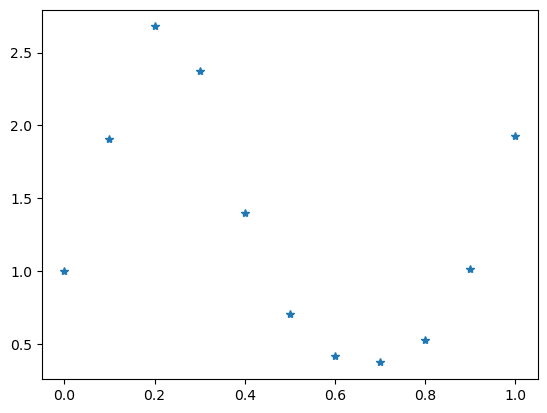

In [304]:
x = np.arange(0.0, 1.01, 0.1)
y = f(x)
plt.plot(x, y, '*')

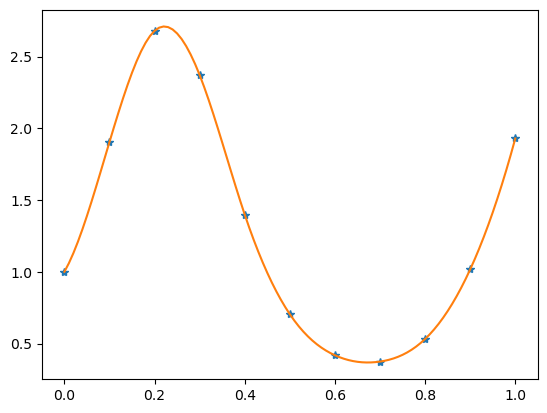

In [306]:
fp = interp1d(x, y, 'cubic')
xp = np.arange(0.0, 1.001, 0.01)
yp = fp(xp)
plt.plot(x, y, '*', xp, yp, '-')
# plt.plot(xp, f(xp))

### Exercises

Given the following functions:

(a) $\cos(\pi^2x^2), x\in[0, 1], n=7.$  
(b) $\ln(x), x\in[1, 3], n=5.$  
(c) $\sin(x^2), x\in[0, 2.5], n=6.$

1. Fit them with a linear interpoation.
2. Fit them with a quadratic spline interpolation.
3. Fit them with a cubic spline interpolation.
4. (Optional) Fit them with a cubic Hermite spline interpolation.

## Rootfinding

**Rootfinding problem:** Given a continuous scalar function $f$ of a scalar variable, find a real number $r$ such that $f(r)=0$.

For roots of polynomials, we use `numpy.polynomial.Polynomial.roots`. For other nonlinear equations, we can use the methods provided in the subpackakge of SciPy, `scipy.optimize`.

Example:

$$
    f(x) = x^2 - e^{-x} = 0, x\in[-2, 2]
$$

In [307]:
def f(x):
    return x**2 - np.exp(-x)

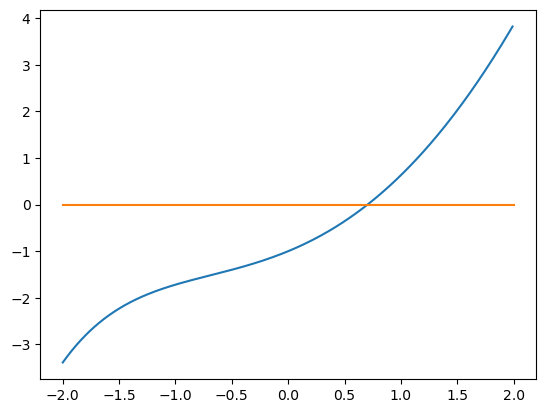

In [308]:
x = np.arange(-2, 2, 0.01)
plt.plot(x, f(x))
plt.plot([-2, 2], [0, 0])

In [309]:
from scipy.optimize import root_scalar

In [310]:
root_scalar(f, bracket=[-2, 2], method='bisect')

      converged: True
           flag: converged
 function_calls: 43
     iterations: 41
           root: 0.7034674224978517
         method: bisect

In [313]:
root_scalar(f, bracket=[-2,2], method='brentq')

      converged: True
           flag: converged
 function_calls: 10
     iterations: 9
           root: 0.7034674224983906
         method: brentq

In [311]:
def df(x):
    return 2*x + np.exp(-x)

In [314]:
root_scalar(f, x0=0.0, fprime=df, method='newton')

      converged: True
           flag: converged
 function_calls: 12
     iterations: 6
           root: 0.7034674224983917
         method: newton

### Exercises

Find the roots of following equations:

1. $2x = \tan(x), x \in [-0.2, 1.4].$
2. $e^{x+1} = 2 + x, x\in[-2,2].$
3. $x^{-2} = \sin(x), x\in[0.5, 4\pi].$ Hint: there are multiple roots. Plot the function to help you find the correct intial guesses.

## Optimization

**Optimization problem:** Given a continuous function $f$ of a scalar variable, find a real number $r$ such that $f(r)$ is the (global) minimum (maximum) of the function.

SciPy provides functions for solving the optimization problem in the subpacakge `scipy.optimize`.

Example:

$$
    f(x) = e^{-x^2}\cos(2x)
$$

In [315]:
from scipy.optimize import minimize_scalar

In [316]:
def f(x):
    return np.exp(-x**2) * np.cos(2*x)

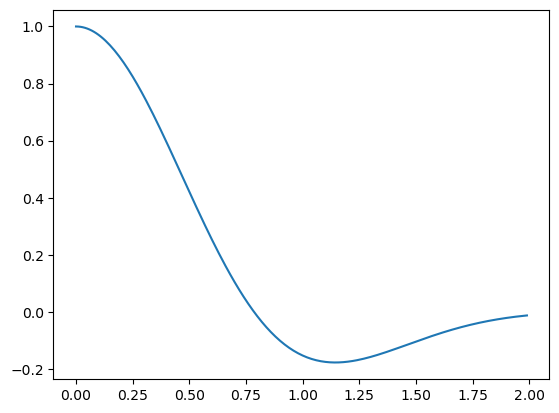

In [317]:
x = np.arange(0, 2, 0.01)
plt.plot(x, f(x))

In [318]:
res = minimize_scalar(f, bracket=[0, 2])
res

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: -0.17757179774279824
       x: 1.1444648721623225
     nit: 13
    nfev: 16

In [319]:
res.x

1.1444648721623225

In simple cases, optimization problem can be converted to the rootfinding problem. If $f(x)$ has a minimum at $x_m$, then the first order derivative at that point is 0, i.e. $f'(x_m) = 0$.

In [320]:
def fprime(x):
    return -2 * np.exp(-x**2) * (x*np.cos(2*x) + np.sin(2*x))

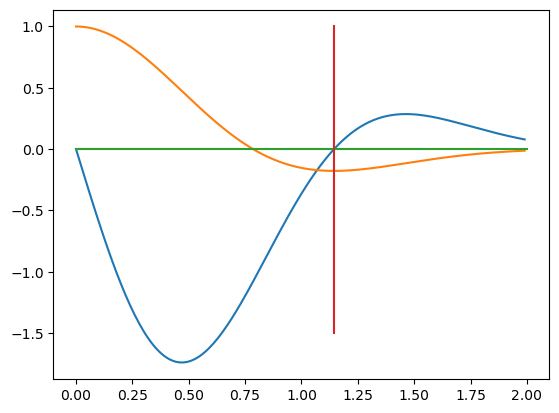

In [321]:
plt.plot(x, fprime(x))
plt.plot(x, f(x))
plt.plot([0, 2], [0, 0])
plt.plot([res.x, res.x], [-1.5, 1.0])

In [322]:
r = root_scalar(fprime, bracket=[0.1, 2.0])

In [323]:
res.x - r.root

8.110601745769941e-09

### Exercises

Find the minimum/maximum of the following functions:

1. $f(x) = \sin(x) + \sin(\frac{10}{3}x), x\in[2.7, 7.5]$. Hint: two maxima and three minima
2. $f(x) = -(16x^2-24x+5)e^{-x}, x\in[1.9, 3.9]$.
3. $f(x) = -(x+\sin(x))e^{-x^2}, x\in[-10, 10]$.
4. $f(x) = -x^{2/3} - (1-x^2)^{1/3}, x\in[0.001, 0.99].$
5. $f(x) = \frac{x^2-5x+6}{x^2+1}, x\in[-5, 5]$.

## Fitting

### Linear regression

In [324]:
from scipy.stats import linregress

In [325]:
x = np.random.random(10)
y = 8*x + 5 + np.random.random(10)

In [326]:
res = linregress(x, y)
res

LinregressResult(slope=8.346849461356742, intercept=5.302554180539262, rvalue=0.9964766711227987, pvalue=6.7135682590086e-10, stderr=0.24838145295545047, intercept_stderr=0.1764576833316211)

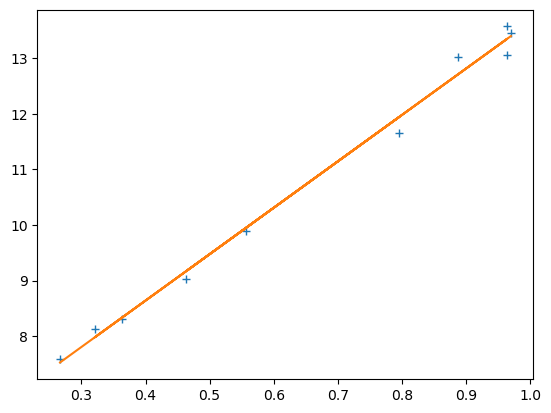

In [327]:
plt.plot(x, y, '+')
plt.plot(x, res.intercept + res.slope * x)

### Curve fitting

In [328]:
from scipy.optimize import curve_fit

In [329]:
# This is the function of curve we want to fit
def f(t, omega, phi):
    return np.cos(omega * t + phi)

In [331]:
# Generate some artifical measurement data
x = np.linspace(0, 3, 50)
y = f(x, 1.5, 1) + .1*np.random.normal(size=50)

In [332]:
# Do curve fitting
popt, pcov = curve_fit(f, x, y)

In [333]:
popt

array([1.49652931, 1.01692076])

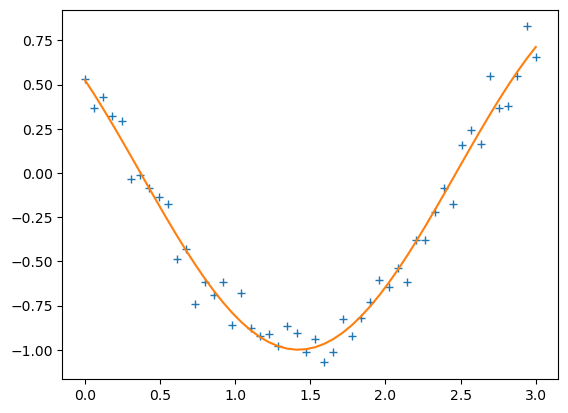

In [334]:
plt.plot(x, y, '+')
plt.plot(x, f(x, *popt))

### Exercises

The total population of US from year 1790 to 1990 are
```
1990 248,709,873
1980 226,545,805
1970 203,211,926
1960 179,323,175
1950 150,697,361
1940 131,669,275
1930 122,775,046
1920 105,710,620
1910 91,972,266
1900 75,994,575
1890 62,947,714
1880 50,155,783
1870 38,558,371
1860 31,443,321
1850 23,191,876
1840 17,063,353
1830 12,860,702
1820 9,638,453
1810 7,239,881
1800 5,308,483
1790 3,929,214
```

Do the following fitting:

1. Linear regression.
2. Fitting with the function $f(t) = ae^{bt}$, where $a, b$ are coefficients to be found.
3. Transform question 2 to a linear fitting problem and fit again.

## Numerical integration

Numerical integration is a way to integrate an definite integral numerically without knowing its antiderivative. It computes:

$$
    I = \int_a^b f(x) dx
$$

The `scipy.integrate` sub-package provides several numerical integration techniques, such as trapezoid, Simpson,Romberg, Gaussian, etc.

### 1D integral

$$
    E_n(x) = \int_1^\infty \frac{e^{-xt}}{t^n} dt.
$$

In [335]:
from scipy.integrate import quad

In [336]:
def f(t, n, x):
    return np.exp(-x * t) / t**n

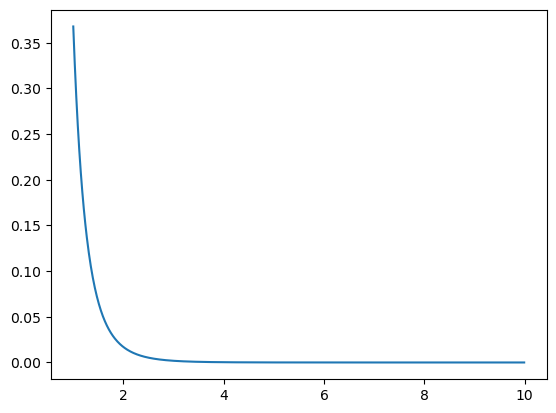

In [337]:
plt.plot(np.arange(1, 10, 0.01), f(np.arange(1, 10, 0.01), 3, 1.0))

In [339]:
def expint(n, x):
    return quad(f, 1, np.inf, args=(n, x))[0]

In [340]:
[expint(3, x) for x in np.arange(1.0, 4.0, 0.5)]

[0.10969196719780967,
 0.056739490167307574,
 0.03013337979781598,
 0.01629536937664461,
 0.008930646543835897,
 0.004945377349584634]

In [341]:
from scipy.special import expn
expn(3, np.arange(1.0, 4.0, 0.5))

array([0.10969197, 0.05673949, 0.03013338, 0.01629537, 0.00893065,
       0.00494538])

### 2D integral

$$
    I_n = \int_0^\infty E_n(x) dx = \int_0^\infty\int_1^\infty \frac{e^{-xt}}{t^n} dtdx = \frac{1}{n}
$$

In [342]:
from scipy.integrate import dblquad

In [343]:
def I(n):
    return dblquad(lambda t, x: np.exp(-x*t)/t**n, 0, np.inf, lambda x: 1, lambda x: np.inf)

In [344]:
I(4)

(0.2500000000043577, 1.2983033346055668e-08)

In [345]:
I(3)

(0.3333333332501089, 1.3888461883425516e-08)

In [346]:
I(2)

(0.4999999999985753, 1.389408365243879e-08)

### Exercises

Find the results of following integrals:

1. $\int_0^1 e^{\sin(x)} dx$.
2. $\int_0^2 x^2e^{-2x} dx$.
3. $\int_0^1 x\ln(1+x) dx$.
4. $\int_0^{\pi/2}e^x\cos(x) dx$.
5. $\int_0^1\sqrt{1-x^2} dx$.
6. $\int_{y=0}^{1/2}\int_{x=0}^{1-2y} xy dx dy$.

## Ordinary differential equations

SciPy provides a function `solve_ivp` to solve a first-order vector differential equation:

$$
    \frac{d\mathbf{u}}{dt} = \mathbf{f}(\mathbf{u}, t)
$$

given intial condition $\mathbf{u} = \mathbf{u}_0$. Higher order ordinary differential equations can always be reduced to differential equations of the type by introducing intermediate derivatives into the $\mathbf{u}$ vector.

### First order, one variable

$$
    \frac{du}{dt} = ku - ru^2
$$

with $k=1.0$, $r=1.0$, and $u_0 = 2.0$. The exact solution is

$$
    u(t) = \frac{k/r}{1 + \left( \frac{k}{ru_0} - 1 \right)e^{-kt}}.
$$

In [347]:
from scipy.integrate import solve_ivp

In [349]:
def dudt(t, u, k, r):
    return k*u - r * u**2

def u_exact(t, k, r, u0):
    a = k/r
    return a / (1 + (a/u0 - 1)*np.exp(-k*t))

In [350]:
k, r, u0 = 1.0, 0.2, 0.8
tmin, tmax = 0.0, 8.0
sol = solve_ivp(dudt, [tmin, tmax], [u0], args=(k, r), dense_output=True)

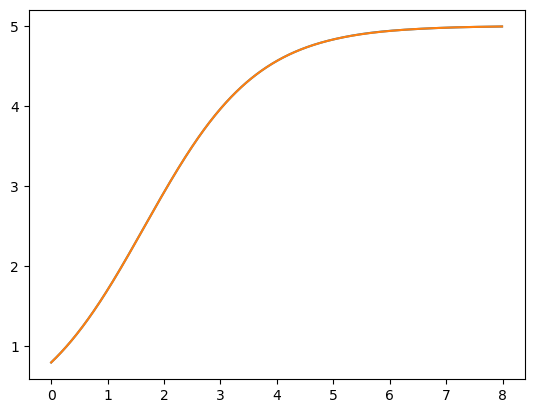

In [351]:
t = np.arange(tmin, tmax, 0.01)
plt.plot(t, [sol.sol(ti) for ti in t])
plt.plot(t, u_exact(t, k, r, u0))

### First order, multiple variables

We use the famous Lotka-Volterra equations for the predator-prey model:

$$
\begin{align}
    \frac{dx}{dt} &= ax - bxy \\
    \frac{dy}{dt} &= -cy + dxy
\end{align}
$$

In [352]:
def lotka_volterra(t, u, a, b, c, d):
    x, y = u
    return [a*x - b*x*y, -c*y + d*x*y]

In [353]:
a, b, c, d = 1.5, 1, 3, 1
tmin, tmax = 0, 15
u0 = [10, 5]
sol = solve_ivp(lotka_volterra, [tmin, tmax], u0, args=(a, b, c, d), dense_output=True)

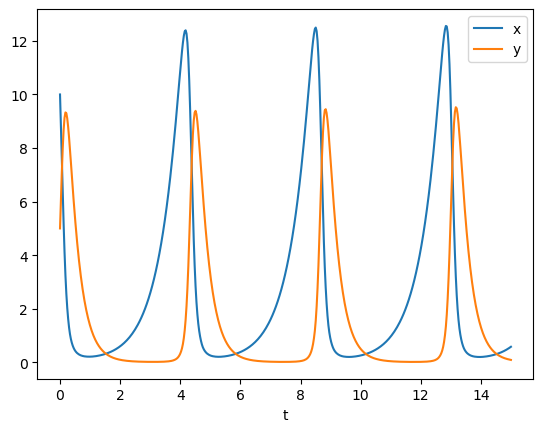

In [354]:
t = np.linspace(tmin, tmax, 500)
u = sol.sol(t)
plt.plot(t, u.T)
plt.xlabel('t')
plt.legend(['x', 'y'])

### Exercises

1. Solve the following ODEs:

(a) $ \frac{du}{dt} = \sin[(u+t)^2], t \in [0,4]$ with $u(0) = -1$.  
(b) $ \frac{du}{dt} = -2tu, t \in [0,2]$ with $u(0) = 2$.  
(c) $ \frac{du}{dt} = u + t, t \in [0,1]$ with $u(0) = 2$.  
(d) $ \frac{du}{dt} = 2u(1-u), t \in [0,2]$ with $u(0) = 1/2$.  
(e) $ \frac{du}{dt} = 2(1+t)(1+u^2), t \in [0,0.5]$ with $u(0) = 0$.

2. A disease that is endemic to a population can be modeled by tracking the fraction of the population that is susceptible to infection, $v(t)$, and the fraction that is infectious, $w(t)$. (The rest of the population is considered to be recovered and immune.) A simple example model is

$$
\begin{align}
    \frac{dv}{dt} &= 0.2(1-v) - 3vw \\
    \frac{dw}{dt} &= (3v-1)w
\end{align}
$$

Starting with $v(0) = 0.95$ and $w(0)=0.05$, find the long-term steady values of $v(t)$ and $w(t)$. Plot both components of the solution as a functions of time.